In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
import tensorflow 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical,plot_model
from keras import backend as k
from keras.layers import Dense

In [2]:
from keras.datasets import mnist

(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
unique,counts=np.unique(ytrain,return_counts=True)
print("train labels:",dict(zip(unique,counts)))
unique,count=np.unique(ytest,return_counts=True)
print("test labels", dict(zip(unique,count)))

train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
test labels {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


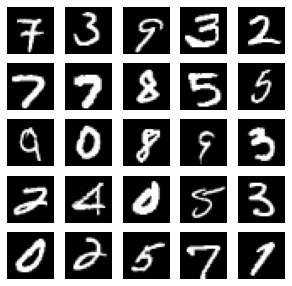

In [7]:
#displaying 25 images of dataset
index=np.random.randint(0,xtrain.shape[0],size =25)
images=xtrain[index]
labels=ytrain[index]

plt.figure(figsize=(5,5))
for i in range(len(index)):
    plt.subplot(5,5,i+1)
    image=images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    
plt.show()

In [8]:
#compute the number of labels
num_labels=len(np.unique(ytrain))
num_labels

10

In [9]:
#convert to one-hot vector

ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [10]:
#image dimensions
a=xtrain.shape[1]
immage_size=a*a
immage_size

784

In [11]:
#resize and normalization
xtrain=np.reshape(xtrain,[-1,immage_size]) #add -1 to match new reshape 
xtrain=xtrain.astype('float32')/255
xtest=np.reshape(xtest,[-1,immage_size])
xtest=xtest.astype('float32')/255

In [12]:
xtrain.shape

(60000, 784)

**building neural network**

In [13]:
#network parameters
batch_size=128
hidden_units=256


In [28]:
from keras.layers import Dropout
import keras

In [29]:
mnist=Sequential()
mnist.add(Dense(hidden_units, input_dim=immage_size,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
mnist.add(Dense(hidden_units,activation='relu'))
mnist.add(Dense(num_labels,activation='softmax'))

In [30]:
mnist.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


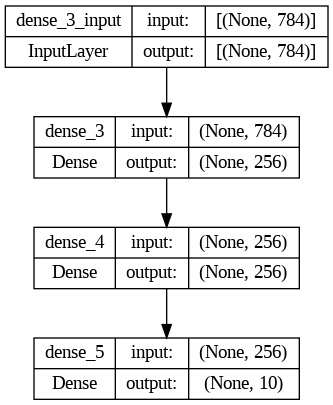

In [31]:
plot_model(mnist,show_shapes=True)

In [32]:
mnist.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h=mnist.fit(xtrain,ytrain,epochs=20, batch_size=batch_size, validation_split=0.3)


Epoch 1/20
329/329 [==============================] - 3s 5ms/step - loss: 0.4985 - accuracy: 0.9098 - val_loss: 0.3012 - val_accuracy: 0.9490
Epoch 2/20
329/329 [==============================] - 2s 7ms/step - loss: 0.2346 - accuracy: 0.9611 - val_loss: 0.2411 - val_accuracy: 0.9544
Epoch 3/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1782 - accuracy: 0.9719 - val_loss: 0.1971 - val_accuracy: 0.9637
Epoch 4/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1453 - accuracy: 0.9772 - val_loss: 0.1707 - val_accuracy: 0.9667
Epoch 5/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1292 - accuracy: 0.9803 - val_loss: 0.1632 - val_accuracy: 0.9678
Epoch 6/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1220 - accuracy: 0.9803 - val_loss: 0.1697 - val_accuracy: 0.9651
Epoch 7/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1128 - accuracy: 0.9824 - val_loss: 0.1436 - val_accuracy: 0.9731
Epoch 

In [33]:
loss,acc=mnist.evaluate(xtest,ytest)
print("test accuracy:" , acc)
print("test loss:", loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.1315 - accuracy: 0.9750
test accuracy: 0.9750000238418579
test loss: 0.13149330019950867


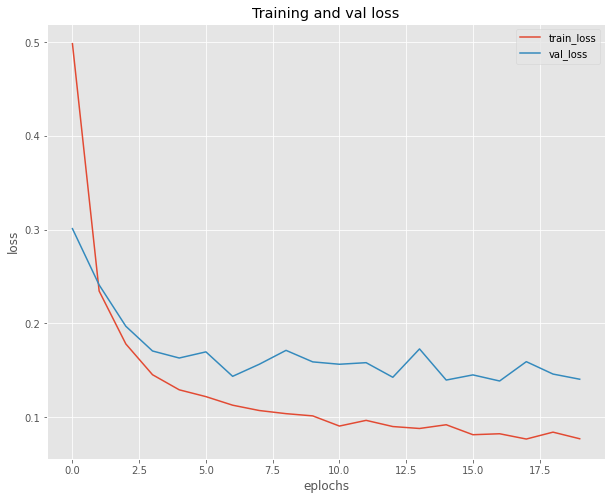

In [34]:
epochs=np.arange(0, len(h.history['loss']))
plt.figure(figsize=(10,8))


plt.style.use("ggplot")
plt.plot(epochs,h.history["loss"],label="train_loss")
plt.plot(epochs,h.history["val_loss"], label="val_loss")
plt.title("Training and val loss")
plt.xlabel("eplochs")
plt.ylabel("loss")
plt.legend()

**Adding Dropout**

In [35]:
mnist=Sequential()
mnist.add(Dense(hidden_units, input_dim=immage_size,activation='relu'))
mnist.add(Dropout(0.45))
mnist.add(Dense(hidden_units,activation='relu'))
mnist.add(Dropout(0.45))
mnist.add(Dense(num_labels,activation='softmax'))

In [36]:
mnist.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h1=mnist.fit(xtrain,ytrain,epochs=20, batch_size=batch_size, validation_split=0.3)

Epoch 1/20
329/329 [==============================] - 3s 6ms/step - loss: 0.5028 - accuracy: 0.8438 - val_loss: 0.1799 - val_accuracy: 0.9469
Epoch 2/20
329/329 [==============================] - 1s 4ms/step - loss: 0.2186 - accuracy: 0.9344 - val_loss: 0.1380 - val_accuracy: 0.9602
Epoch 3/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1680 - accuracy: 0.9492 - val_loss: 0.1162 - val_accuracy: 0.9656
Epoch 4/20
329/329 [==============================] - 2s 6ms/step - loss: 0.1418 - accuracy: 0.9565 - val_loss: 0.1141 - val_accuracy: 0.9665
Epoch 5/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1224 - accuracy: 0.9620 - val_loss: 0.1038 - val_accuracy: 0.9707
Epoch 6/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1135 - accuracy: 0.9640 - val_loss: 0.0984 - val_accuracy: 0.9721
Epoch 7/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0985 - accuracy: 0.9689 - val_loss: 0.0961 - val_accuracy: 0.9722
Epoch 

In [37]:
loss,acc=mnist.evaluate(xtest,ytest)
print("test accuracy:" , acc)
print("test loss:", loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9810
test accuracy: 0.9810000061988831
test loss: 0.07064111530780792


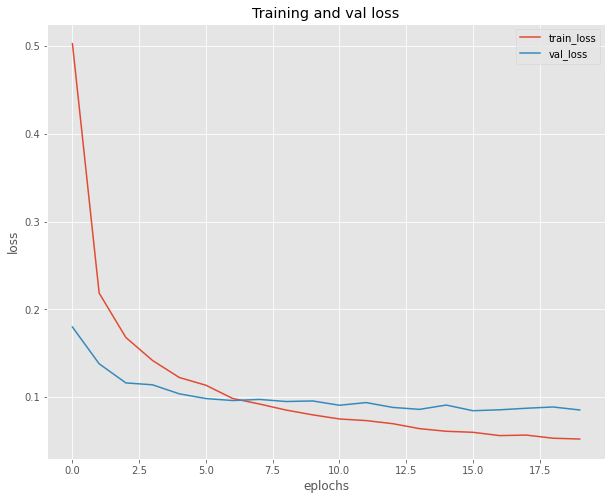

In [38]:
epochs=np.arange(0, len(h1.history['loss']))
plt.figure(figsize=(10,8))


plt.style.use("ggplot")
plt.plot(epochs,h1.history["loss"],label="train_loss")
plt.plot(epochs,h1.history["val_loss"], label="val_loss")
plt.title("Training and val loss")
plt.xlabel("eplochs")
plt.ylabel("loss")
plt.legend()